# Pokemon RPG Image Generator

## To use: 

- Run all code cells in order. There should not be any errors or outputs except for images.

- When you see the cell saying `Modify Here`, edit the marked portion of that cell and run it.

### Imports

In [1]:
from PIL import Image

### Setup images and text

In [2]:
all_text = Image.open("images/text-sheet.png")
width, height = all_text.size
text_width = 12
text_height = 12

chars = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890:+-,.¡!¿?''“”♂♀_ /"
text_dict = {}

i=0
for char in chars:
    text_dict[char] = all_text.crop((i*text_width,0,(i+1)*text_width,text_height))
    i += 1

portrait_background = Image.open("images/background.png")
h,w = portrait_background.size


vibes = Image.open("images/vibes.png")
image = None

vibe_types = ["RED", "RED_ORANGE", "ORANGE", "ORANGE_YELLOW", "YELLOW", "LIGHT_YELLOW", "LIGHT_GREEN",
              "GREEN", "BLUE_GREEN", "LIGHT_BLUE", "BLUE", "LIGHT_PURPLE", "LIGHT_PINK", "PINK", 
              "MAGENTA", "DARK_GREY", "DARK_PURPLE", "WHITE", "LIGHT_BROWN", "BROWN", "SILVER", "PURPLE"]
vibe_dict = {}
w,h = vibes.size
screen_width = w/len(vibe_types)

i=0
for color in vibe_types:
    vibe_dict[color] = vibes.crop((i*screen_width,0,(i+1)*screen_width,h))
    i += 1

# Modify Here

This is where you will configure the content of the plate.

- Make sure you define the path to the pokemon image you want, and that the image is either 96x96 or 288x288.
- You can type almost any text you want in here for name/ability, but if you use any special characters not included in the text sheet file file, you will get an error later.

Here is a sample of what the faceplate will look like


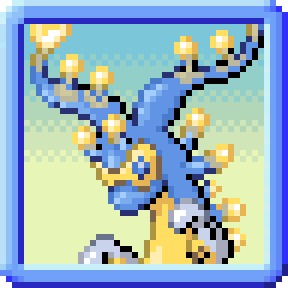

In [3]:
# ---- Faceplate pokemon. Run this a few times until it looks correct ----
POKEMON_IMAGE_PATH = "images/pokemon/171.446.png"
X_OFFSET = 10
Y_OFFSET = 10


# --- Define stuff on the content of the card ---
LEADER = True   # True if this is a larger leader plate. False otherwise
NAME = "Sample Player"
ABILITY_NAME = "Lightning Rod"
LEADER_ABILITY_NAME = "Illuminate"
APPLES = "6/12"
MONEY = "50"

# --- Items ---
# Items should be a 16x16 file in the images/items folder. Type the exact filename here minus the png extension.
ITEM1 = "apple"
ITEM2 = "gold-gummi"
ITEM3 = "pink-berry"
ITEM4 = "item"
ITEM5 = "tm"
ITEM6 = "none"
ITEM7 = "none"
ITEM8 = "none"

ITEM1_ACTIVE = False
ITEM2_ACTIVE = True
ITEM3_ACTIVE = False
ITEM4_ACTIVE = False
ITEM5_ACTIVE = False
ITEM6_ACTIVE = False
ITEM7_ACTIVE = False
ITEM8_ACTIVE = False

# --- Background and styling ---
FRAME_COLOR = "BLUE"    # BLUE, PINK, or GREEN

TOP_COLOR_CHOICE = "LIGHT_BLUE"     # Color choices defined below
BOTTOM_COLOR_CHOICE = "LIGHT_YELLOW" 
# "RED", "RED_ORANGE", "ORANGE", "ORANGE_YELLOW", "YELLOW", "LIGHT_YELLOW", "LIGHT_GREEN",
# "GREEN", "BLUE_GREEN", "LIGHT_BLUE", "BLUE", "LIGHT_PURPLE", "LIGHT_PINK", "PINK", 
# "MAGENTA", "DARK_GREY", "DARK_PURPLE", "WHITE", "LIGHT_BROWN", "BROWN", "SILVER", "PURPLE"

# ----- DO NOT MODIFY BELOW HERE ----------

if FRAME_COLOR == "PINK":
    frame = Image.open("images/frame_pink.png")
elif FRAME_COLOR == "GREEN":
    frame = Image.open("images/frame_green.png")
else:
    frame = Image.open("images/frame_blue.png")

# This just refreshes the background on this cell
portrait_background = Image.open("images/background.png")

pokemon = Image.open(POKEMON_IMAGE_PATH)
pc = pokemon.resize((96,96), resample=0).crop((X_OFFSET, Y_OFFSET, X_OFFSET+w, Y_OFFSET+h))
portrait_background.paste(pc, mask=pc)
frame.paste(portrait_background, (4,4), mask=portrait_background)
faceplate = frame

print("Here is a sample of what the faceplate will look like")
faceplate.resize((288,288), resample=0)

## Run all the cells below once the above image looks correct

In [4]:
# Helper code to allow us to generate text boxes of any size)
frame_top_left = frame.crop((0,0,5,5))
frame_top_right = frame.crop((frame.width-5,0,frame.width, 5))
frame_bottom_left = frame.crop((0,frame.height-5, 5, frame.height))
frame_bottom_right = frame.crop((frame.width-5,frame.height-5,frame.width,frame.height))

frame_top = frame.crop((frame.width//2,0,frame.width//2 + 1, 5))
frame_right = frame.crop((frame.width-5, frame.height//2, frame.width, frame.height//2 + 1))
frame_left = frame.crop((0 ,frame.height//2 ,5, frame.height//2 + 1))
frame_bottom = frame.crop((frame.width//2,frame.height -5 ,frame.width//2 + 1, frame.height))


def make_frame_with_size(x,y):
    new_frame = Image.new("RGBA",(x,y), (0,0,0,0))
    if x < 10 or y<10:
        raise ValueError

    new_frame.paste(frame_top_left, (0,0), mask=frame_top_left)
    new_frame.paste(frame_top_right, (x-5,0), mask=frame_top_right)
    new_frame.paste(frame_bottom_left, (0,y-5), mask=frame_bottom_left)
    new_frame.paste(frame_bottom_right, (x-5,y-5), mask=frame_bottom_right)

    width_to_fill = x-10
    height_to_fill = y-10

    top_bar = frame_top.resize((width_to_fill,5), resample=0)
    bottom_bar = frame_bottom.resize((width_to_fill,5), resample=0)
    left_bar = frame_left.resize((5,height_to_fill), resample=0)
    right_bar = frame_right.resize((5,height_to_fill), resample=0)

    new_frame.paste(top_bar, (5,0), mask=top_bar)
    new_frame.paste(bottom_bar, (5,y-5), mask=bottom_bar)
    new_frame.paste(left_bar, (0,5), mask=left_bar)
    new_frame.paste(right_bar, (x-5,5), mask=right_bar)

    black_box = Image.new("RGBA",(x-8, y-8), (32,32,32,255))
    new_frame.paste(black_box, (4,4), mask=black_box)

    return new_frame

# Helper function to write out text
def paste_string_at_start_coords(image, word, x_start, y_start, text_spacing, big=False):
    i = 0
    for char in word:
        char_img = text_dict[char].resize((24,24), resample=0) if big else text_dict[char]
        image.paste(char_img, (x_start + (i*text_spacing), y_start), mask=char_img)
        i+= 1

## Make the card

This is the cell where all the drawing happens.

If you need to adjust the placement of anything on the canvas, here is where you can play with that

256


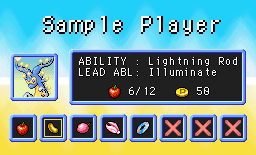

In [5]:
# ----- Most of the layout is done based on proportions, but there are a few offsets that are added manually. You can play with those here. ------

text_spacing = 7 # How many pixels apart each text character should be
name_offset_y = 14 # How many pixels from the top the player name is
faceplate_x = 10 # Distance between the left side of the screen and the faceplate

text_box_height = 56 if LEADER else 26 # How tall the text box is
textbox_margins_x = 16 # How many pixels of padding minimum we want to the right of the last character in the text box

ability_text_start_x = 7 # How many pixels of breathing room the ability text has on the left of the text box
ability_text_start_y = 7 # How many pixels of breathing room the ability text has on the top of the text box
leader_ability_spacing_y = 11 # How many pixels down from the ability do we start writing the leader ability

apple_money_spacing = 20 # amount of spacing between the end of the apple text and the start of the money text
apple_text_spacing = 4 # space between the apple icon and the start of the text
money_text_spacing = 4 # space between the money icon and the start of the text
apple_money_height = 7 # distance between center of the text box and the apples/money display

item_spacing_y = 13 # distance between the items and the bottom of the image
item_between_spacing = 2 # distance between each item

# --------------

# Make the wavy background
top_im = vibe_dict[TOP_COLOR_CHOICE]
w,h = top_im.size
im = top_im.crop((0, 0, w, h/2))

background = vibe_dict[BOTTOM_COLOR_CHOICE]
background.paste(im, mask=im.convert('RGBA'))

# Try to make the middle look a little less ugly
white = Image.new("RGBA",(background.width, background.height//20), (255,255,255, 235))
background.paste(white, (0, background.height//2))

# Resize the image based on what kind of card we are making
if LEADER:
    background = background.resize((w, background.height - background.height//6))
else:
    background = background.resize((w, background.height//3))

# Composite our elements on there
image = background
image_width, image_height = image.size

image.paste(faceplate, (faceplate_x, image_height//2 - faceplate.height//2), mask=faceplate)

# Make the textbox
ability = f"ABILITY : {ABILITY_NAME}"
textbox_size = len(ability) * (text_spacing) + textbox_margins_x

leader_ability = f"LEAD ABL: {LEADER_ABILITY_NAME}"
if LEADER:
    # If we need to put money and leader ability on the card, make sure we have space for that 
    icon_spacing_needed = 16 + apple_text_spacing + len(APPLES) * text_spacing + apple_money_spacing + 16 + money_text_spacing + len(MONEY) * (text_spacing)
    textbox_size = max([textbox_size, 
                        len(leader_ability) * (text_spacing) + textbox_margins_x, 
                        icon_spacing_needed + textbox_margins_x])

text_box = make_frame_with_size(textbox_size,text_box_height)
paste_string_at_start_coords(text_box, ability, ability_text_start_x, ability_text_start_y, text_spacing)

if LEADER:
    paste_string_at_start_coords(text_box, leader_ability, ability_text_start_x, ability_text_start_y + leader_ability_spacing_y, text_spacing)
    
    # Fill in the apple and money icons
    apple = Image.open("images/apple.png")
    money_icon = Image.open("images/money.png")

    icon_width = apple.width + apple_text_spacing + len(APPLES) * text_spacing + apple_money_spacing + money_icon.width + money_text_spacing + len(MONEY) * (text_spacing)
    start_x = text_box.width//2 - icon_width //2

    text_box.paste(apple, (start_x, text_box.height//2 + apple_money_height), mask=apple)
    start_x += apple.width + apple_text_spacing

    paste_string_at_start_coords(text_box, APPLES, start_x, text_box.height//2 +apple_money_height+2, text_spacing)
    start_x += len(APPLES) * text_spacing + apple_money_spacing

    text_box.paste(money_icon, (start_x, text_box.height//2 + apple_money_height ), mask=money_icon)
    start_x += money_icon.width + money_text_spacing

    paste_string_at_start_coords(text_box, MONEY, start_x, text_box.height//2 +apple_money_height+2, text_spacing)

# Paste the textbox in the center of the remaining area
right_x_offset = ( (image.width + faceplate.width + faceplate_x)//2 - text_box.width //2)
image.paste(text_box, (right_x_offset, image.height//2 - text_box.height//2), mask=text_box)

if LEADER:
    # Name at the top
    paste_string_at_start_coords(image, NAME, (image.width//2 - ((len(NAME) * text_spacing))), name_offset_y, text_spacing *2, big=True)

    # Add items
    items = [(ITEM1, ITEM1_ACTIVE), (ITEM2, ITEM2_ACTIVE), (ITEM3, ITEM3_ACTIVE), (ITEM4, ITEM4_ACTIVE), (ITEM5, ITEM5_ACTIVE), (ITEM6, ITEM6_ACTIVE), (ITEM7, ITEM7_ACTIVE), (ITEM8, ITEM8_ACTIVE)]
    num_item = len(items)
    box_size = 16+10+2 # Items are 16x16, frames have 5 width borders, and 1 pix buffer for the outline
    length_of_bar = num_item * box_size + ( item_between_spacing * num_item - 1)
    start_items_x = image.width//2 - length_of_bar//2

    for i in range(num_item):
        item, is_active = items[i]
        item_image = Image.open(f"images/items/{item}.png")
        item_box = make_frame_with_size(box_size,box_size) 
        
        # Add an outline if we need it
        if is_active:
            outline = Image.new("RGBA", (18, 18), (240, 216, 104, 255))
            fillin = Image.new("RGBA", (16, 16), (32,32,32,255))
            item_box.paste(outline, (5,5), mask=outline)
            item_box.paste(fillin, (6,6), mask=fillin)

        item_box.paste(item_image, (6,6), mask=item_image)
        image.paste(item_box, (start_items_x + ((item_box.width + item_between_spacing) * i), image.height - item_box.height - item_spacing_y), mask=item_box)

image.show()
print(image_width)
image



## Run this cell for upscaled images

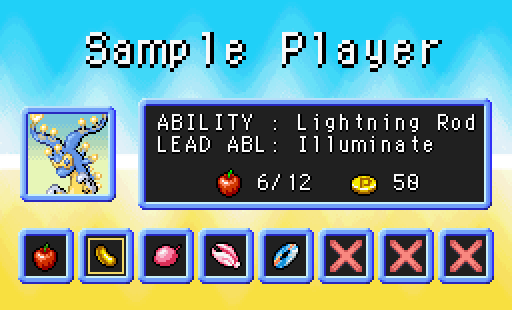

In [6]:
image.resize((image.width*2,image.height*2), resample=0).show()
image.resize((image.width*2,image.height*2), resample=0)